# LOCA2 USDA Plant Heartiness

In [1]:
##########################################################
#
# Library Calls.
#

# loading numpy

import numpy             as np

# loading matplotlib

import matplotlib.pyplot as plt

# loading xarray

import xarray            as xr

# Loading pandas

import pandas            as pd

# Loading MetPy

import metpy             as metpy


# Loading Cartopy's Projection and 
#   Geospatial Dataset Plotting Features

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature


import subprocess as subprocess

def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx
#
##########################################################

In [2]:
##########################################################
#
# File and Inventory Control
#

root_directory       = "/data/DATASETS/LOCA_MACA_Ensembles/LOCA2/LOCA2_CONUS/Climate_CONUS/Annual/"
root_url             = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Annual/"

loca2_inventory_file = "/data/DATASETS/LOCA_MACA_Ensembles/LOCA2/LOCA2_CONUS/Original_CONUS/LOCA2_Model_Member_Available_List.csv"
loca2_ensembles_list = pd.read_csv(filepath_or_buffer = loca2_inventory_file)

loca2_ensembles_list = loca2_ensembles_list.query('Rank == 1')

models               = loca2_ensembles_list[ "Model"].values
members              = loca2_ensembles_list["Member"].values
n_complete_enss      = loca2_ensembles_list["n_complete_ens"].values
historical_invs      = loca2_ensembles_list["historical"].values
ssp245_invs          = loca2_ensembles_list["ssp245"].values
ssp370_invs          = loca2_ensembles_list["ssp370"].values
ssp585_invs          = loca2_ensembles_list["ssp585"].values

prec_invs            = loca2_ensembles_list["pr"].values
tmax_invs            = loca2_ensembles_list["tasmax"].values
tmin_invs            = loca2_ensembles_list["tasmin"].values

scenarios            = ["historical", 
                        "ssp245", 
                        "ssp370", 
                        "ssp585"]


display(loca2_ensembles_list)





#
##########################################################




,Model_Member,Model,Member,Var,Season,Stat,NetError,Rank,historical,ssp245,ssp370,ssp585,tasmax,tasmin,pr,n_complete_ens,n_avail_ens
0,1,GFDL-ESM4,r1i1p1f1,All,Annual,Both,6.152235,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
1,2,BCC-CSM2-MR,r1i1p1f1,All,Annual,Both,6.357673,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
2,3,GFDL-CM4,r1i1p1f1,All,Annual,Both,6.498461,1,XNP,XNP,---,XNP,H2-5,H2-5,H2-5,3,3
3,4,CNRM-CM6-1,r1i1p1f2,All,Annual,Both,6.513064,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
4,5,TaiESM1,r1i1p1f1,All,Annual,Both,6.658829,1,XNP,XNP,XNP,---,H23-,H23-,H23-,3,3
5,6,CNRM-ESM2-1,r1i1p1f2,All,Annual,Both,6.681317,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
6,7,CNRM-CM6-1-HR,r1i1p1f2,All,Annual,Both,6.990708,1,XNP,---,---,XNP,H--5,H--5,H--5,2,2
7,8,INM-CM4-8,r1i1p1f1,All,Annual,Both,7.238094,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
8,9,MIROC6,r1i1p1f1,All,Annual,Both,8.165782,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
9,10,MRI-ESM2-0,r5i1p1f1,All,Annual,Both,9.399468,1,XNP,---,XNP,---,H-3-,H-3-,H-3-,2,2


In [3]:
##########################################################
#
# Extract Geospatial Metadata
#

history_initialization_file = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Annual/historical/LOCA2-CONUS-ANNUAL_MIN___tasmin___GFDL-ESM4.r1i1p1f1___historical.nc"
future_initialization_file  = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Annual/ssp585/LOCA2-CONUS-ANNUAL_MIN___tasmin___GFDL-ESM4.r1i1p1f1___ssp585.nc"

xf_h = xr.open_dataset(filename_or_obj = history_initialization_file)
xf_f = xr.open_dataset(filename_or_obj =  future_initialization_file)

xf_h = xf_h.metpy.parse_cf()
xf_f = xf_f.metpy.parse_cf()

display(xf_h.metpy_crs.metpy.cartopy_crs)
data_crs = xf_h.metpy_crs.metpy.cartopy_crs

lat    = xf_h["lat"]
lon    = xf_h["lon"]
time_h = xf_h["time"]
time_f = xf_f["time"]

lon_rap = 360-103.2310
lat_rap =      44.0805

i_rap = geo_idx(lon, lon_rap).values.tolist()
j_rap = geo_idx(lat, lat_rap).values.tolist()

print("===")
print(lon_rap, i_rap, lon[i_rap].values.tolist())
print("===")

print(lat_rap, j_rap, lat[j_rap].values.tolist())
print("----")

#
##########################################################

<Derived Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

===
256.769 356 256.78125
===
44.0805 323 44.09375
----


In [5]:
##########################################################
#
# file
#

fileloc = root_directory + "/"+scenarios[-1] +  "/" + "LOCA2-CONUS-ANNUAL30YRUNMEAN_MIN___tasmin___ALLRANK01___ssp585.nc"

print(fileloc)

ds_ssp5 = xr.open_dataset(filename_or_obj = fileloc)

display(ds_ssp5)


/data/DATASETS/LOCA_MACA_Ensembles/LOCA2/LOCA2_CONUS/Climate_CONUS/Annual//ssp585/LOCA2-CONUS-ANNUAL30YRUNMEAN_MIN___tasmin___ALLRANK01___ssp585.nc


<xarray.Dataset>
Dimensions:       (lat: 474, lon: 944, model_member: 17, time: 122)
Coordinates:
  * lat           (lat) float32 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
  * lon           (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * time          (time) datetime64[ns] 1965-07-02T12:00:00 ... 2086-07-02T12...
  * model_member  (model_member) int16 1 2 3 4 6 7 8 9 ... 15 16 19 20 22 23 24
Data variables:
    tasmin        (model_member, time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...
    history:      Tue Dec 12 19:28:33 2023: ncks -C -O -x -v model_member ./t...
    NCO:          netCDF Operators version 5.1.7-alpha02 (Homepage = http://n...
    scenario:     ssp585

In [6]:
time_series = ds_ssp5["tasmin"][:,:,j_rap,i_rap]



<xarray.DataArray 'tasmin' (model_member: 17, time: 122)>
[2074 values with dtype=float32]
Coordinates:
    lat           float32 44.09
    lon           float32 256.8
  * time          (time) datetime64[ns] 1965-07-02T12:00:00 ... 2086-07-02T12...
  * model_member  (model_member) int16 1 2 3 4 6 7 8 9 ... 15 16 19 20 22 23 24
Attributes:
    standard_name:  air_temperature
    long_name:      2-m Min Daily Air Temperature
    units:          degC
    description:    2-m Min Daily Air Temperature
    cell_methods:   time: minimum within days  time: minimum within years  ti...

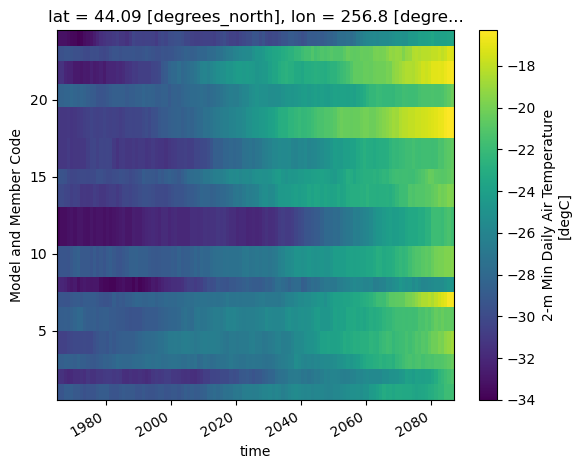

In [7]:
display(time_series)
time_series.plot()

In [8]:
tasmin_ra[:,j_rap,i_rap].plot()
tasmin[:,j_rap,i_rap].plot()
plt.show()


NameError: name 'tasmin_ra' is not defined

In [ ]:
display(tasmin_ra)

NameError: name 'tasmin_degF_avg' is not defined

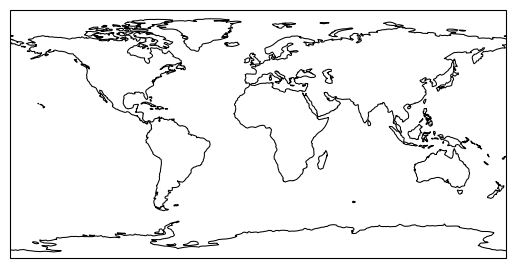

In [9]:
###################################################
#
# Integrating a projection data to our image data.
#




# make a figure space 

fig = plt.figure()

# add a plot element just one field

                   # nrows, ncols, index [which oddly starts with one (go fig)],
ax = fig.add_subplot(    1,     1,     1, 
                     projection = data_crs)

#ax.set_extent((lon.min(), lon.max(), lat.min(), lat.max()))

# of you use the coastlines and add_feature you can see it does 
#   the full cone and our place on it


ax.coastlines(resolution = 'auto',
              linewidths =  0.75)

t2m_degF_levels = np.arange(start = -60,
                            stop  =  70,
                            step  =  5)

contour = tasmin_degF_avg.plot(cmap          = plt.cm.rainbow, 
                               levels        = t2m_degF_levels,
                               cbar_kwargs   = {"orientation" : "horizontal", 
                                                "pad":.01})



ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
 
#ax.gridlines(draw_labels=True)

# here is our plot from above.

# and pow this will give us our mapping.

# Let's overlay our pressure contours.




plt.show()

#
###################################################